<a href="https://colab.research.google.com/github/Mahy-31/CS-Minor-assignment/blob/main/Solution_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
import time
import random

In [2]:
def generate_grid(size=10, obstacle_prob=0.2):
    grid = np.zeros((size, size), dtype=int)

    for i in range(size):
        for j in range(size):
            if random.random() < obstacle_prob:
                grid[i][j] = 1

    free_cells = [(i, j) for i in range(size) for j in range(size) if grid[i][j] == 0]
    start, goal = random.sample(free_cells, 2)

    grid[start] = 2
    grid[goal] = 3

    return grid, start, goal

In [3]:
def plot_grid(grid, path=None, title="Grid"):
    cmap = plt.cm.get_cmap('Greys')
    plt.imshow(grid == 1, cmap=cmap, origin='upper')

    start = np.argwhere(grid == 2)
    goal = np.argwhere(grid == 3)

    if start.size:
        plt.scatter(start[0][1], start[0][0], marker='o', color='green', label='Start')
    if goal.size:
        plt.scatter(goal[0][1], goal[0][0], marker='x', color='red', label='Goal')

    if path:
        px, py = zip(*path)
        plt.plot(py, px, color='blue', linewidth=2, label='Path')

    plt.legend()
    plt.title(title)
    plt.show()

In [4]:
def astar(grid, start, goal, heuristic_func):
    rows, cols = grid.shape
    open_set = []
    heapq.heappush(open_set, (0, start))

    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic_func(start, goal)}

    nodes_expanded = 0
    directions = [(-1,0), (1,0), (0,-1), (0,1)]

    while open_set:
        _, current = heapq.heappop(open_set)
        nodes_expanded += 1

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path, nodes_expanded

        for dx, dy in directions:
            neighbor = (current[0] + dx, current[1] + dy)

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] != 1:
                tentative_g = g_score[current] + 1
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = tentative_g + heuristic_func(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None, nodes_expanded

In [5]:
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def euclidean(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def diagonal(a, b):
    return max(abs(a[0] - b[0]), abs(a[1] - b[1]))

In [6]:
def compare_heuristics(num_runs=10, size=10, obstacle_prob=0.2):
    heuristics = {
        "Manhattan": manhattan,
        "Euclidean": euclidean,
        "Diagonal": diagonal
    }

    results = {h: {"time": [], "path_length": [], "nodes": []} for h in heuristics}

    for _ in range(num_runs):
        grid, start, goal = generate_grid(size, obstacle_prob)

        for name, func in heuristics.items():
            start_time = time.time()
            path, nodes = astar(grid, start, goal, func)
            end_time = time.time()

            if path:
                results[name]["time"].append(end_time - start_time)
                results[name]["path_length"].append(len(path))
                results[name]["nodes"].append(nodes)

    return results

results = compare_heuristics(num_runs=15)
print("Comparison complete!")

Comparison complete!


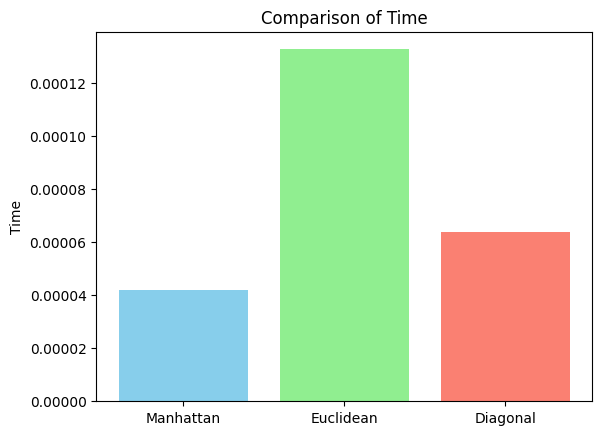

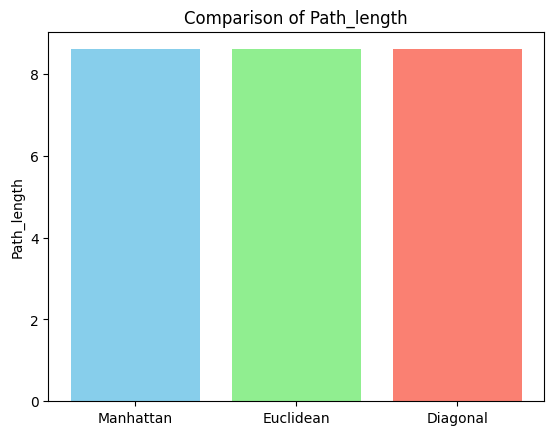

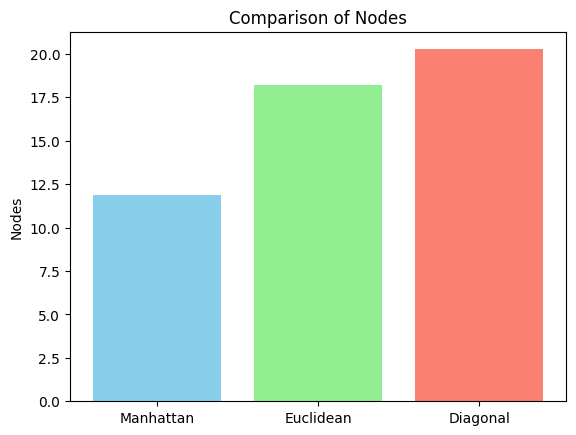

In [7]:
def plot_comparison(results):
    metrics = ["time", "path_length", "nodes"]
    for metric in metrics:
        plt.figure()
        values = [np.mean(results[h][metric]) for h in results]
        plt.bar(results.keys(), values, color=['skyblue', 'lightgreen', 'salmon'])
        plt.title(f"Comparison of {metric.capitalize()}")
        plt.ylabel(metric.capitalize())
        plt.show()

plot_comparison(results)

Start: (5, 1)
Goal: (4, 2)


/tmp/ipython-input-2492460901.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Greys')


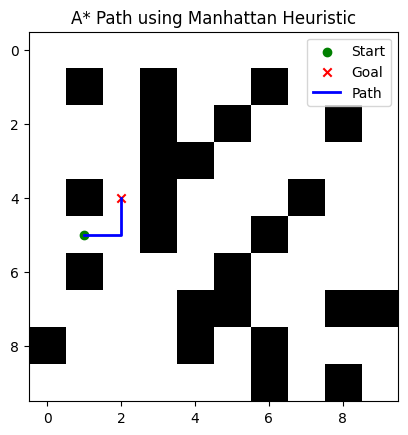

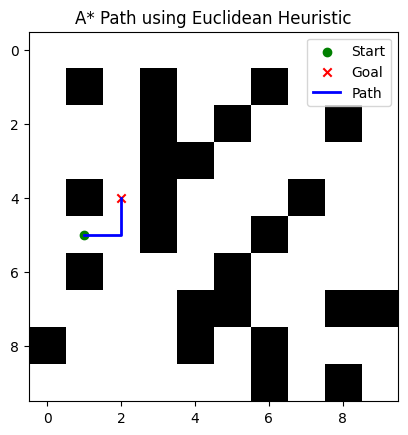

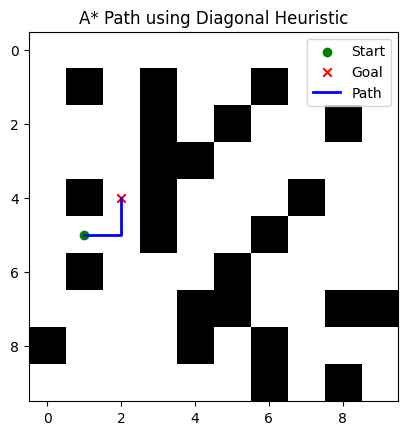

In [8]:
grid, start, goal = generate_grid(size=10, obstacle_prob=0.25)

path_manhattan, _ = astar(grid, start, goal, manhattan)
path_euclidean, _ = astar(grid, start, goal, euclidean)
path_diagonal, _ = astar(grid, start, goal, diagonal)

print("Start:", start)
print("Goal:", goal)

plot_grid(grid, path_manhattan, title="A* Path using Manhattan Heuristic")
plot_grid(grid, path_euclidean, title="A* Path using Euclidean Heuristic")
plot_grid(grid, path_diagonal, title="A* Path using Diagonal Heuristic")